# DSA 5102 - Project

# Foo Jen Han

# A0158623B

# Preamble

For this project, I will be using the data set downloaded at https://www.kaggle.com/datasnaek/youtube-new. There are several files that can be downloaded; each file contains the data of trending YouTube videos in each country. For the purpose of this project, I have decided to focus on trending YouTube videos in USA. When downloaded from https://www.kaggle.com/datasnaek/youtube-new, the file name is 'USvideos.csv'. I have renamed the file 'USvideos.csv' to 'usyoutubevideos.csv' and placed 'usyoutubevideos.csv' in the same folder as this file.

In [1]:
import pandas as pd
import urllib.request
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [2]:
np.random.seed(123)  # For reproducibility

# Introduction

The data `usyoutubevideos.csv` contains the list of YouTube videos trending in the United States from the fixed time period of the year 2017. Every YouTube video must belong to a YouTube category, but cannot belong to more than 1 YouTube category. Intuitively, some categories of YouTube videos are likely to be more viewed than other categories. There are a total of 16 distinct categories and each category is coded by a number.

The goal of this project is to use supervised learning methods to predict views and id_category of YouTube videos. For the unsupervised learning method, we will do some feature selection on the data using 2 unsurpervised learning methods, Principal Component Analysis (PCA) and kernel PCA. We will compare the results between the 2 PCA methods, and use cross-validation to select the best supervised learning model.

## US Trending Videos

In the table below, we display the raw data. As seen from the data, we seek to predict category_id based on the other factors such as channel_title, tags, likes, dislikes, views, description etc.

In [3]:
youtube_data = pd.read_csv('./usyoutubevideos.csv')

In [4]:
pd.set_option('display.max_columns', None)
youtube_data

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...


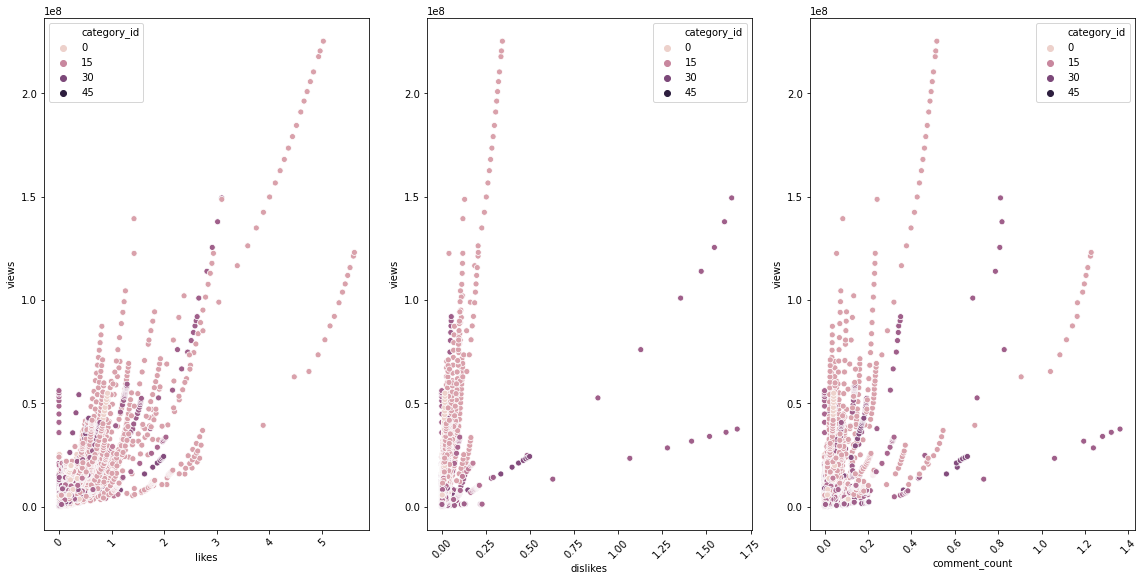

In [5]:
fig, ax = plt.subplots(1, 3, figsize=(16, 8))

sns.scatterplot(
    x='likes',
    y='views',
    hue='category_id',
    data=youtube_data,
    ax=ax[0]
)

sns.scatterplot(
    x='dislikes',
    y='views',
    hue='category_id',
    data=youtube_data,
    ax=ax[1]
)

sns.scatterplot(
    x='comment_count',
    y='views',
    hue='category_id',
    data=youtube_data,
    ax=ax[2]
)

fig.tight_layout()

for a in ax:
    a.set_xticklabels(a.get_xticklabels(), rotation=45)


From the 3 scatter plots, we can see that likes, dislikes and comment_count are positively correlated with views. Moreover, the videos with the highest views belong to the same category as they are of the same hue. Most of the videos are also of the same hue, indicating that the majority of the trending videos belong to the same category. Based on the scatter plot, it appears that the strongest factor that correlates positively with views are the number of likes. 

# Generalized Linear Models

The first supervised learning method to be used is Generalized Linear Models, which will be used to predict `views`, from the variables `likes`, `dislikes`, `commments`, and `category_id`.

The original data set has more than 40000 data points. Due to the extensive time needed to train the Generalized Linear Models on such a large data set, we will only use 10% of the data set. Hence, a random sample of about 4000 data points will be used to train the Generalized Linear Models. 

Since the number of categories of YouTube videos are fixed, we should first do one-hot encoding for the number of categories before spliting the data set into training and testing set, in case some sparse categories appear in the testing set and not the training set or vice versa.

In [6]:
youtube_modified = youtube_data.copy()
youtube_modified = youtube_modified.sample(frac=0.1)

for title in ['video_id', 'trending_date', 'title', 'channel_title', 'publish_time', 'tags', 'thumbnail_link', 'description']:
    youtube_modified.pop(title)

youtube_modified['category_id'] = youtube_modified['category_id'].astype(str)

youtube_modified = pd.get_dummies(youtube_modified)

youtube_modified.drop(youtube_modified[youtube_modified['comments_disabled']  == 'TRUE'].index, inplace=True)
youtube_modified.drop(youtube_modified[youtube_modified['ratings_disabled']  == 'TRUE'].index, inplace=True)
youtube_modified.drop(youtube_modified[youtube_modified['video_error_or_removed']  == 'TRUE'].index, inplace=True)

for t in ['comments_disabled', 'ratings_disabled', 'video_error_or_removed']:
    youtube_modified.pop(t)

youtube_modified

C:\Users\jenha\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,views,likes,dislikes,comment_count,category_id_1,category_id_10,category_id_15,category_id_17,category_id_19,category_id_2,category_id_20,category_id_22,category_id_23,category_id_24,category_id_25,category_id_26,category_id_27,category_id_28,category_id_29,category_id_43
28182,5524232,266387,7637,14388,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11164,51657,706,190,316,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
35979,1307019,42396,598,1469,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
21110,1642462,41986,1357,3079,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
30424,4672279,134699,12344,39312,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38483,7131651,617531,3724,59237,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3739,117240,3889,200,422,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
8350,382628,12121,110,905,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9641,636877,16818,841,950,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [7]:
youtube_glm_train, youtube_glm_test = train_test_split(youtube_modified, test_size=0.1)

In [8]:
glm_ss = MinMaxScaler()
youtube_glm_train = pd.DataFrame(glm_ss.fit_transform(youtube_glm_train),columns = youtube_glm_train.columns)
youtube_glm_test = pd.DataFrame(glm_ss.fit_transform(youtube_glm_test),columns = youtube_glm_test.columns)

In [9]:
youtube_glm_train

,views,likes,dislikes,comment_count,category_id_1,category_id_10,category_id_15,category_id_17,category_id_19,category_id_2,category_id_20,category_id_22,category_id_23,category_id_24,category_id_25,category_id_26,category_id_27,category_id_28,category_id_29,category_id_43
0,0.015348,0.007697,0.006313,0.013517,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.018112,0.018334,0.009197,0.004800,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.028166,0.016408,0.082722,0.007082,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.003437,0.002478,0.001325,0.000597,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.000438,0.000260,0.001577,0.000559,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3680,0.002714,0.002208,0.002019,0.001690,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3681,0.012007,0.009603,0.003368,0.002367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3682,0.002202,0.000565,0.001283,0.001390,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3683,0.036821,0.048158,0.077753,0.025132,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
inputs_glm = list(youtube_glm_train.columns)
inputs_glm.remove('views')
outputs_glm = 'views'

x_glm_train = youtube_glm_train[youtube_glm_train.columns.intersection(inputs_glm)]
y_glm_train = youtube_glm_train[outputs_glm]

x_glm_test = youtube_glm_test[youtube_glm_test.columns.intersection(inputs_glm)]
y_glm_test = youtube_glm_test[outputs_glm]

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.kernel_ridge import KernelRidge

## Linear Kernel Ridge Regression

In [12]:
Linear_Kernel = KernelRidge(alpha=1, degree=1)
Linear_Kernel.fit(
    X=x_glm_train,
    y=y_glm_train,
)

KernelRidge(degree=1)

Mean accuracy: 0.686467064632273
Std accuracy: 0.10193339680226064


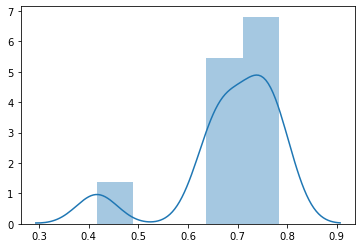

In [13]:
scores = cross_val_score(Linear_Kernel, x_glm_train, y_glm_train, cv=10)
print(f'Mean accuracy: {np.mean(scores)}')
print(f'Std accuracy: {np.std(scores)}')
sns.distplot(scores)

In [14]:
print(f'Train accuracy: {Linear_Kernel.score(x_glm_train, y_glm_train)}')
print(f'Mean CV accuracy: {np.mean(scores)}')
print(f'Test accuracy: {Linear_Kernel.score(x_glm_test, y_glm_test)}')

Train accuracy: 0.7333254296906531
Mean CV accuracy: 0.686467064632273
Test accuracy: 0.5156037107901896


## Polynomial Kernel Ridge Regression

In [15]:
Poly_Kernel = KernelRidge(alpha=1, kernel='polynomial', degree=3)
Poly_Kernel.fit(
    X=x_glm_train,
    y=y_glm_train,
)

KernelRidge(kernel='polynomial')

Mean accuracy: 0.5968784364711949
Std accuracy: 0.07407454481275519


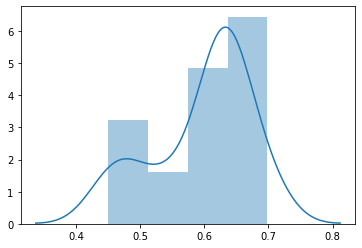

In [16]:
scores = cross_val_score(Poly_Kernel, x_glm_train, y_glm_train, cv=10)
print(f'Mean accuracy: {np.mean(scores)}')
print(f'Std accuracy: {np.std(scores)}')
sns.distplot(scores)

In [17]:
print(f'Train accuracy: {Poly_Kernel.score(x_glm_train, y_glm_train)}')
print(f'Mean CV accuracy: {np.mean(scores)}')
print(f'Test accuracy: {Poly_Kernel.score(x_glm_test, y_glm_test)}')

Train accuracy: 0.639705417476514
Mean CV accuracy: 0.5968784364711949
Test accuracy: 0.6035057986318904


## Radial Basis Function Kernel Ridge Regression

In [18]:
RBF_Kernel = KernelRidge(alpha=1, kernel='rbf')
RBF_Kernel.fit(
    X=x_glm_train,
    y=y_glm_train,
)

KernelRidge(kernel='rbf')

Mean accuracy: 0.5451511179371945
Std accuracy: 0.06184231626546159


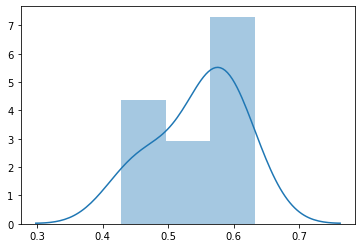

In [19]:
scores = cross_val_score(RBF_Kernel, x_glm_train, y_glm_train, cv=10)
print(f'Mean accuracy: {np.mean(scores)}')
print(f'Std accuracy: {np.std(scores)}')
sns.distplot(scores)

In [20]:
print(f'Train accuracy: {RBF_Kernel.score(x_glm_train, y_glm_train)}')
print(f'Mean CV accuracy: {np.mean(scores)}')
print(f'Test accuracy: {RBF_Kernel.score(x_glm_test, y_glm_test)}')

Train accuracy: 0.5875500812263219
Mean CV accuracy: 0.5451511179371945
Test accuracy: 0.6285196852370805


## Discussion of Generalized Linear Models results

Surprisingly, the model with the highest mean cv accuracy and test accuracy belongs to the Linear Kernel Ridge regression. Hence, there is no need for the use of kernels to predict the number of views as simple linear regression is the best performing model. This suggests that number of comments, likes, dislikes, and video categories are highly linearly correlated with number of views. 

# Decision Trees

The second supervised learning method to be introduced is Decision Trees. In the section on Decision trees, we will use Decision Tree Regressors to predict `views`, from the variables `likes`, `dislikes`, `commments`, and `category_id`, and compare the result with the Generalized Linear Models used previously. To improve the result, we will use Random Forests as a form of bootstrap aggregating (bagging). 

Finally, we will introduce the use of Decision Tree classifier to predict the category of the videos. 

## Decision Tree Regressor

For the first supervised learning method, we have used Generlaized Linear Models to predict `views`, from the variables `likes`, `dislikes`, `commments`, and `category_id`. We will now use a second supervised learning method, Decision Trees, to predict `views`, from the variables `likes`, `dislikes`, `commments`, and `category_id`.

The pre-processing of the data is similar to that for the Generalized Linear Models. We will do one-hot encoding for 'category_id' as we do not want to normalize categorical data. Due to the extensive time needed to train Decision Trees on such a large data set, we will only use 10% of the data set. Hence, a random sample of about 4000 data points will be used to train the Decision Trees model.

In [21]:
youtube_dtrg = youtube_data.copy()
youtube_dtrg = youtube_dtrg.sample(frac=0.1)

for title in ['video_id', 'trending_date', 'title', 'channel_title', 'publish_time', 'tags', 'thumbnail_link', 'description']:
    youtube_dtrg.pop(title)

youtube_dtrg['category_id'] = youtube_dtrg['category_id'].astype(str)

youtube_dtrg = pd.get_dummies(youtube_dtrg)

youtube_dtrg.drop(youtube_dtrg[youtube_dtrg['comments_disabled']  == 'TRUE'].index, inplace=True)
youtube_dtrg.drop(youtube_dtrg[youtube_dtrg['ratings_disabled']  == 'TRUE'].index, inplace=True)
youtube_dtrg.drop(youtube_dtrg[youtube_dtrg['video_error_or_removed']  == 'TRUE'].index, inplace=True)

for t in ['comments_disabled', 'ratings_disabled', 'video_error_or_removed']:
    youtube_dtrg.pop(t)

youtube_dtrg

C:\Users\jenha\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,views,likes,dislikes,comment_count,category_id_1,category_id_10,category_id_15,category_id_17,category_id_19,category_id_2,category_id_20,category_id_22,category_id_23,category_id_24,category_id_25,category_id_26,category_id_27,category_id_28,category_id_29,category_id_43
24728,684106,21157,720,2085,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
34916,800873,19909,744,5017,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
8903,1446140,64501,2171,3888,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4413,420943,1423,141,1152,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
34133,1580732,58461,830,1063,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10137,172035,2837,86,191,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4049,991568,49395,1189,3432,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16667,207652,462,286,97,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
16528,383805,18421,575,2557,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [22]:
youtube_dtrg_train, youtube_dtrg_test = train_test_split(youtube_dtrg, test_size=0.1)

In [23]:
ss_dtrg = MinMaxScaler()
youtube_dtrg_train = pd.DataFrame(ss_dtrg.fit_transform(youtube_dtrg_train), columns = youtube_dtrg_train.columns)
youtube_dtrg_test = pd.DataFrame(ss_dtrg.fit_transform(youtube_dtrg_test), columns = youtube_dtrg_train.columns)

In [24]:
youtube_dtrg_train

,views,likes,dislikes,comment_count,category_id_1,category_id_10,category_id_15,category_id_17,category_id_19,category_id_2,category_id_20,category_id_22,category_id_23,category_id_24,category_id_25,category_id_26,category_id_27,category_id_28,category_id_29,category_id_43
0,0.023724,0.106790,0.011846,0.149855,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.001145,0.001540,0.000520,0.001124,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.002290,0.002531,0.019555,0.002817,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.001912,0.001957,0.001838,0.001147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.008689,0.008235,0.003727,0.003958,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3680,0.003530,0.002699,0.000559,0.000349,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3681,0.005649,0.009794,0.002287,0.004512,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3682,0.001671,0.004532,0.001883,0.000985,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3683,0.000221,0.000149,0.001202,0.000194,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
inputs_dtrg = list(youtube_dtrg_train.columns)
inputs_dtrg.remove('views')
outputs_dtrg = 'views'

x_dtrg_train = youtube_dtrg_train[youtube_dtrg_train.columns.intersection(inputs_dtrg)]
y_dtrg_train = youtube_dtrg_train[outputs_dtrg]

x_dtrg_test = youtube_dtrg_test[youtube_dtrg_test.columns.intersection(inputs_dtrg)]
y_dtrg_test = youtube_dtrg_test[outputs_dtrg]

In [26]:
from sklearn.tree import DecisionTreeRegressor

In [27]:
dt_regressor = DecisionTreeRegressor(splitter='random', max_depth=5)
dt_regressor.fit(x_dtrg_train, y_dtrg_train)

DecisionTreeRegressor(max_depth=5, splitter='random')

Mean accuracy: 0.4766002522257925
Std accuracy: 0.5150370059629034


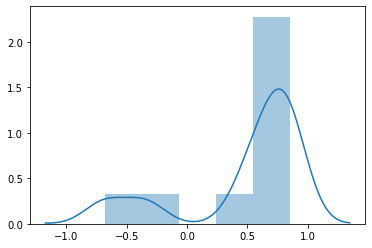

In [28]:
scores = cross_val_score(dt_regressor, x_dtrg_train, y_dtrg_train, cv=10)
print(f'Mean accuracy: {np.mean(scores)}')
print(f'Std accuracy: {np.std(scores)}')
sns.distplot(scores)

In [29]:
print(f'Train accuracy: {dt_regressor.score(x_dtrg_train, y_dtrg_train)}')
print(f'Mean CV accuracy: {np.mean(scores)}')
print(f'Test accuracy: {dt_regressor.score(x_dtrg_test, y_dtrg_test)}')

Train accuracy: 0.8554447531674999
Mean CV accuracy: 0.4766002522257925
Test accuracy: 0.5838409594222311


In [30]:
from sklearn.tree import plot_tree

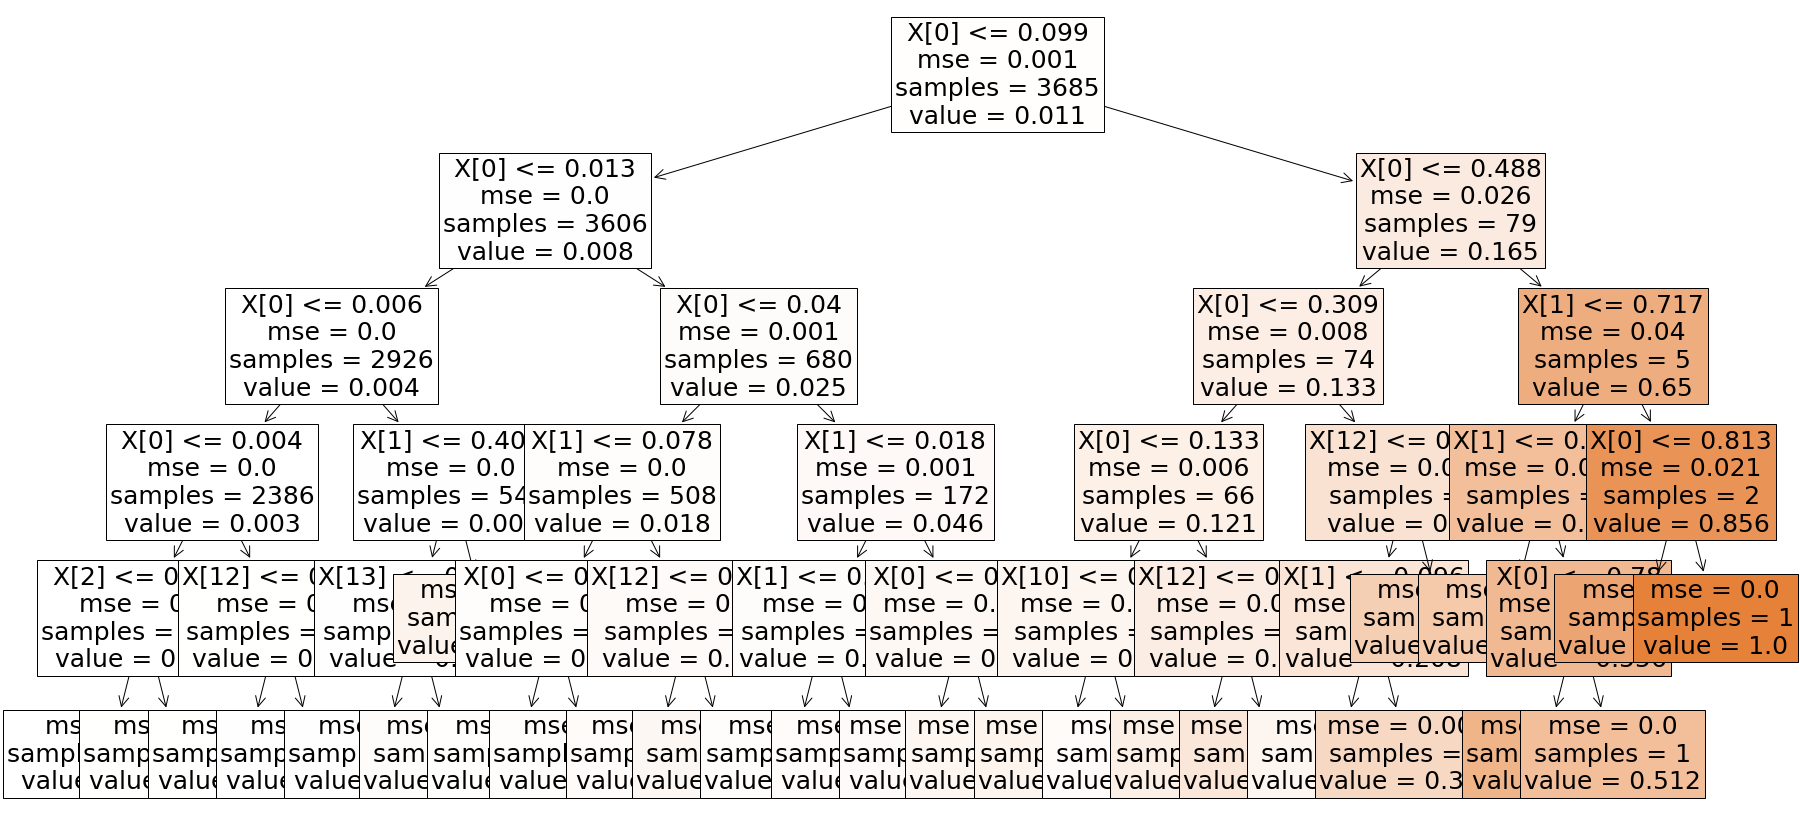

In [31]:
plt.figure(figsize=(30, 15))
plot_tree(
    dt_regressor,
    filled=True,
    fontsize=25
);

From the plot of the Decision Treee above, we can see how it arrives at the decision. 

## Random Forest for Decision Tree Regressor

We will now use Random Forests to predict `views`, from the variables `likes`, `dislikes`, `commments`, `category_id`, and compare the generalized error with the Decision Tree done previously. Finally, we will compare the the generalized error of using Generalized Linear Models, Decison Trees, and Random Forests. 

In [33]:
from sklearn.ensemble import RandomForestRegressor

In [34]:
rfr = RandomForestRegressor(n_estimators=100, max_depth=5)
rfr.fit(x_dtrg_train, y_dtrg_train)

RandomForestRegressor(max_depth=5)

In [35]:
print(f'Train accuracy: {rfr.score(x_dtrg_train, y_dtrg_train)}')
scores = cross_val_score(rfr, x_dtrg_train, y_dtrg_train, cv=10)
print(f'Mean CV accuracy: {np.mean(scores)}')
print(f'Test accuracy: {rfr.score(x_dtrg_test, y_dtrg_test)}')

Train accuracy: 0.9147798131851997
Mean CV accuracy: 0.7732179350059382
Test accuracy: 0.5563047013924995


As compared to the Decision Tree model, the train accuracy, mean cv accuracy, and test accuracy is higher for Random Forest model, as use of bagging algorithms reduce variance. We will plot a graph of accuracy (generalized error) against depth for train accuracy, mean cv accuracy and test accuracy, and compare the results between the Random Forst model and the Decision Tree model. 

In [36]:
results_dt = []
results_rfr = []
for depth in range(2, 8):
    dtr = DecisionTreeRegressor(max_depth=depth)
    dtr.fit(x_dtrg_train, y_dtrg_train)
    train_dtr_acc = dtr.score(x_dtrg_train, y_dtrg_train)
    test_dtr_acc = dtr.score(x_dtrg_test, y_dtrg_test)
    cv_dtr_acc = np.mean(cross_val_score(dtr, x_dtrg_train, y_dtrg_train, cv=10))
    results_dt.append([depth, train_dtr_acc, test_dtr_acc, cv_dtr_acc])
    rfr = RandomForestRegressor(max_depth=depth)
    rfr.fit(x_dtrg_train, y_dtrg_train)
    train_rfr_acc = rfr.score(x_dtrg_train, y_dtrg_train)
    test_rfr_acc = rfr.score(x_dtrg_test, y_dtrg_test)
    cv_rfr_acc = np.mean(cross_val_score(rfr, x_dtrg_train, y_dtrg_train, cv=10))
    results_rfr.append([depth, train_rfr_acc, test_rfr_acc, cv_rfr_acc])

results_dt = pd.DataFrame(
    data=results_dt,
    columns=['depth', 'train accuracy', 'test accuracy', 'cv accuracy'],
)
results_dt = pd.melt(
    results_dt,
    id_vars=['depth'],
    var_name='type',
    value_name='accuracy'
) 

results_rfr = pd.DataFrame(
    data=results_rfr,
    columns=['depth', 'train accuracy', 'test accuracy', 'cv accuracy'],
)
results_rfr = pd.melt(
    results_rfr,
    id_vars=['depth'],
    var_name='type',
    value_name='accuracy'
)

Text(0.5, 1.0, 'Random Forest')

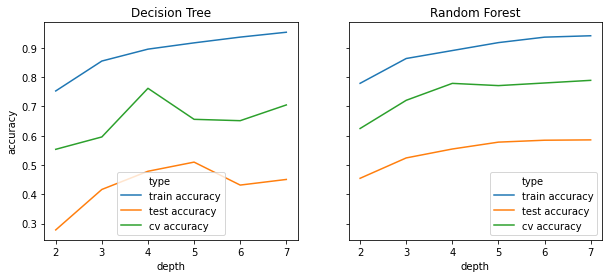

In [37]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

sns.lineplot(
    x='depth',
    y='accuracy',
    hue='type',
    data=results_dt,
    ax=ax[0]
)
ax[0].set_title('Decision Tree')

sns.lineplot(
    x='depth',
    y='accuracy',
    hue='type',
    data=results_rfr,
    ax=ax[1]
)
ax[1].set_title('Random Forest')

## Discussion of Decision Tree, Random Forests and Generalized Linear model results

As seen from the 2 graphs above, the Random Forest model has a much higher cv accuracy than the Decision Tree model. Generally, mean cv accuracy gives better prediction of test error. The Decision Tree model has very low mean cv accuracy. This is because Random Forest algorithm is a baggging method, which reduces varaince, assuming that the errors between each Tree in the model are uncorrelated. Moreover, Random Forest model had a higher mean cv accuracy and test accuracy than any of the Generalized Linear Models, making it the best model to predict `views` from the variables `likes`, `dislikes`, `commments`, and `category_id`.

## Decision Tree Classifier

Another problem to consider is to use Decision Trees to classify the videos into their respective `category_id`, using `views`, `likes`, `dislikes`, `comments` as training parameters. 

In [38]:
youtube_dtc = youtube_data.copy()
youtube_dtc = youtube_dtc.sample(frac=0.1)

for title in ['video_id', 'trending_date', 'title', 'channel_title', 'publish_time', 'tags', 'thumbnail_link', 'description']:
    youtube_dtc.pop(title)

youtube_dtc.drop(youtube_dtc[youtube_dtc['comments_disabled']  == 'TRUE'].index, inplace=True)
youtube_dtc.drop(youtube_dtc[youtube_dtc['ratings_disabled']  == 'TRUE'].index, inplace=True)
youtube_dtc.drop(youtube_dtc[youtube_dtc['video_error_or_removed']  == 'TRUE'].index, inplace=True)

for t in ['comments_disabled', 'ratings_disabled', 'video_error_or_removed']:
    youtube_dtc.pop(t)

youtube_dtc

C:\Users\jenha\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,category_id,views,likes,dislikes,comment_count
39800,24,338841,17944,362,1560
9660,19,366729,13218,426,2591
13154,10,132837,5070,83,610
8507,10,1371557,127319,1164,16057
25803,22,1732872,46176,513,2662
...,...,...,...,...,...
3632,10,57539,1538,39,84
40548,1,13619534,347100,6923,19977
6979,26,411284,21003,251,2877
14992,23,1421293,115308,942,8508


In [39]:
youtube_dtc_train, youtube_dtc_test = train_test_split(youtube_dtc, test_size=0.1)

In [40]:
inputs_dtc = list(youtube_dtc_train.columns)
inputs_dtc.remove('category_id')
outputs_dtc = 'category_id'

x_dtc_train = youtube_dtc_train[youtube_dtc_train.columns.intersection(inputs_dtc)]
y_dtc_train = youtube_dtc_train[outputs_dtc]

x_dtc_test = youtube_dtc_test[youtube_dtc_test.columns.intersection(inputs_dtc)]
y_dtc_test = youtube_dtc_test[outputs_dtc]

In [41]:
ss_dtc = MinMaxScaler()
x_dtc_train = pd.DataFrame(ss_dtc.fit_transform(x_dtc_train), columns = x_dtc_train.columns)
x_dtc_test = pd.DataFrame(ss_dtc.fit_transform(x_dtc_test), columns = x_dtc_train.columns)

In [42]:
x_dtc_train

,views,likes,dislikes,comment_count
0,0.003671,0.003244,0.001146,0.002904
1,0.036422,0.026375,0.005018,0.015065
2,0.003516,0.004715,0.000464,0.000538
3,0.000383,0.000122,0.000023,0.000043
4,0.002877,0.003934,0.000246,0.000746
...,...,...,...,...
3680,0.003576,0.001805,0.000258,0.000177
3681,0.001757,0.000447,0.000350,0.000885
3682,0.002177,0.000960,0.000115,0.000437
3683,0.000179,0.000459,0.000095,0.000161


In [43]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
dt_classifier = DecisionTreeClassifier(splitter='random', max_depth=5)
dt_classifier.fit(x_dtc_train, y_dtc_train)

DecisionTreeClassifier(max_depth=5, splitter='random')

Mean accuracy: 0.2654051785083068
Std accuracy: 0.015191345423306846


C:\Users\jenha\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


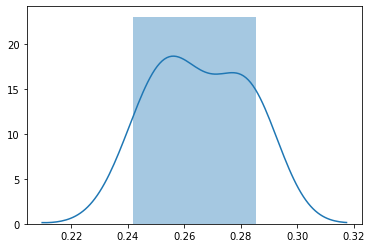

In [45]:
scores = cross_val_score(dt_classifier, x_dtc_train, y_dtc_train, cv=10)
print(f'Mean accuracy: {np.mean(scores)}')
print(f'Std accuracy: {np.std(scores)}')
sns.distplot(scores)

In [46]:
print(f'Train accuracy: {dt_classifier.score(x_dtc_train, y_dtc_train)}')
print(f'Mean CV accuracy: {np.mean(scores)}')
print(f'Test accuracy: {dt_classifier.score(x_dtc_test, y_dtc_test)}')

Train accuracy: 0.2835820895522388
Mean CV accuracy: 0.2654051785083068
Test accuracy: 0.24390243902439024


As shown by the values of train accuracy and mean cv accuracy, there is little relation between `category_id` and `views`, `likes`, `dislikes`, `comments`. We will attempt to increase the mean cv accuracy and test accuracy by using Random Forest Classifiers.

## Random Forest Classifier

We now try to imporve the Decision Tree model using a Random Forest model.

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
rfc = RandomForestRegressor(n_estimators=100, max_depth=5)
rfc.fit(x_dtc_train, y_dtc_train)

RandomForestRegressor(max_depth=5)

In [49]:
print(f'Train accuracy: {rfc.score(x_dtc_train, y_dtc_train)}')
scores = cross_val_score(rfc, x_dtc_train, y_dtc_train, cv=10)
print(f'Mean CV accuracy: {np.mean(scores)}')
print(f'Test accuracy: {rfc.score(x_dtc_test, y_dtc_test)}')

Train accuracy: 0.17629850029614258
Mean CV accuracy: 0.09523705074668941
Test accuracy: 8.712489232787224e-05


## Discussion of Decision Tree and Random Forest classification

For classifiying `category_id`, it is shown that Random Forests classifier performs worse than Decision Tree classifier. This implies that the higher mean cv accuracy and higher test accuracy of the Decision Tree classifier was due to chance, and that there is very little relation between `category_id` and the variables `likes`, `dislikes`, `commments`. It is possible that the features of the words in `tags` and `description` have a greater relation to `views`. 

# Dimension Reduction

For the unsupervised learning problem, we will use Principal Component Analysis (PCA) and Kernel PCA to reduce the dimension of the dataset and discuss some interesting findings. 

## Principal Component Analysis



In [50]:
from sklearn.decomposition import PCA

In [51]:
youtube_pca = youtube_data.sample(frac=0.1)

for title in ['video_id', 'title', 'publish_time', 'tags', 'thumbnail_link', 'video_error_or_removed', 'description']:
    youtube_pca.pop(title)

youtube_pca['category_id'] = youtube_pca['category_id'].astype(str)

youtube_pca = pd.get_dummies(youtube_pca)

In [53]:
pca_ss = MinMaxScaler()
youtube_pca = pd.DataFrame(pca_ss.fit_transform(youtube_pca), columns = youtube_pca.columns)

In [54]:
pca = PCA()
pca.fit(youtube_pca)

PCA()

We visualise the graph of explained variance against the principal component index and use the 'elbow method' to choose a suitable index `j` of the principal component index so that rate of decrease of the explained variance does not drop drastically after the `j` index. The first graph shows a logarithmic scale and the second graph shows a non-logarithmic scale. It is clear that `j` should be between 0 and 100.

Text(0, 0.5, 'Eigenvalues (Explained variance)')

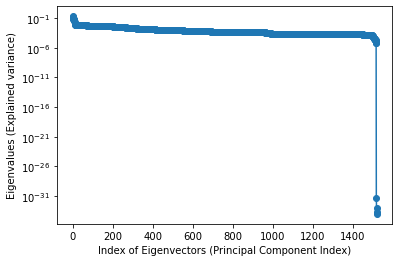

In [55]:
plt.semilogy(pca.explained_variance_, '-o')
plt.xlabel('Index of Eigenvectors (Principal Component Index)')
plt.ylabel('Eigenvalues (Explained variance)')

Text(0, 0.5, 'Eigenvalues (Explained variance)')

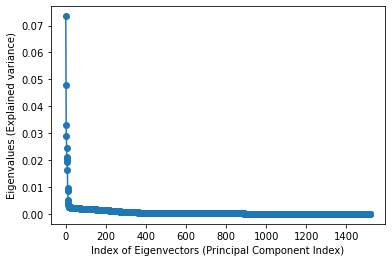

In [56]:
plt.plot(pca.explained_variance_ratio_, '-o')
plt.xlabel('Index of Eigenvectors (Principal Component Index)')
plt.ylabel('Eigenvalues (Explained variance)')

Text(0, 0.5, 'Eigenvalues (Explained variance)')

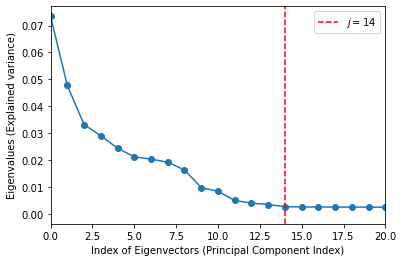

In [57]:
plt.plot(pca.explained_variance_ratio_, '-o')
plt.axvline(x=14, c='r', ls='--', label=r'$j=14$')
plt.xlim(0,20)
plt.legend()
plt.xlabel('Index of Eigenvectors (Principal Component Index)')
plt.ylabel('Eigenvalues (Explained variance)')

By looking closely at the values close to the origin, we deduce that `j=14`. Hence we should now perform PCA again with `n_components=14`.

In [58]:
pca_2 = PCA(n_components=14)
pca_2.fit(youtube_pca)

PCA(n_components=14)

Text(0, 0.5, 'Eigenvalues (Explained variance)')

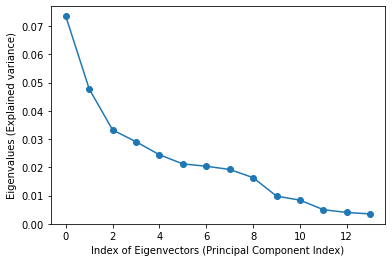

In [59]:
plt.plot(pca_2.explained_variance_ratio_, '-o')
plt.xlabel('Index of Eigenvectors (Principal Component Index)')
plt.ylabel('Eigenvalues (Explained variance)')

## Kernel Principal Component Analysis

Instead of linear PCA, we will now do RBF kernel PCA.

In [61]:
from sklearn.decomposition import KernelPCA

In [62]:
kernel_pca = KernelPCA(kernel='rbf')
kernel_pca.fit(youtube_pca)

KernelPCA(kernel='rbf')

Text(0, 0.5, 'Eigenvalues (Explained variance)')

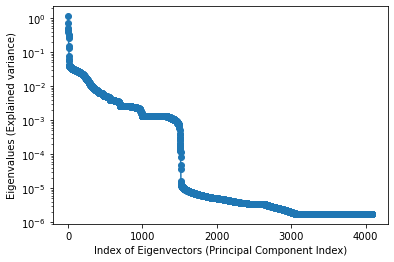

In [63]:
plt.semilogy(kernel_pca.lambdas_, '-o')
plt.xlabel('Index of Eigenvectors (Principal Component Index)')
plt.ylabel('Eigenvalues (Explained variance)')

Text(0, 0.5, 'Eigenvalues (Explained variance)')

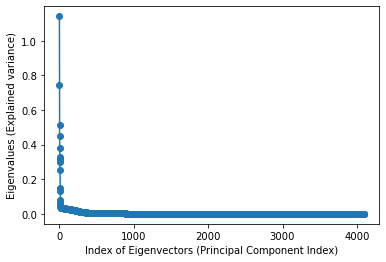

In [64]:
plt.plot(kernel_pca.lambdas_, '-o')
plt.xlabel('Index of Eigenvectors (Principal Component Index)')
plt.ylabel('Eigenvalues (Explained variance)')

Text(0, 0.5, 'Eigenvalues (Explained variance)')

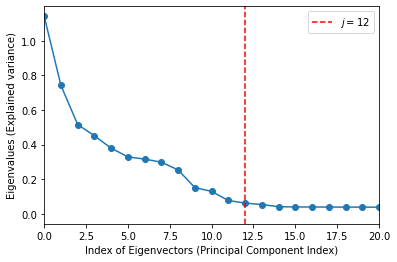

In [65]:
plt.plot(kernel_pca.lambdas_, '-o')
plt.axvline(x=12, c='r', ls='--', label=r'$j=12$')
plt.xlim(0,20)
plt.legend()
plt.xlabel('Index of Eigenvectors (Principal Component Index)')
plt.ylabel('Eigenvalues (Explained variance)')

By looking closely at the values close to the origin, we deduce that `j=12`. Hence we should now perform Kernel PCA again with `n_components=12`.

In [66]:
kernel_pca_2 = KernelPCA(n_components=12, kernel='rbf')
kernel_pca_2.fit(youtube_pca)

KernelPCA(kernel='rbf', n_components=12)

Text(0, 0.5, 'Eigenvalues (Explained variance)')

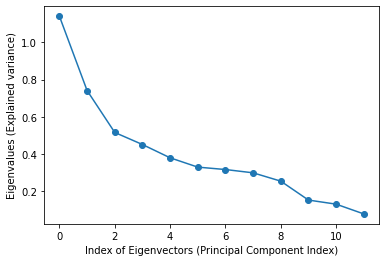

In [67]:
plt.plot(kernel_pca_2.lambdas_, '-o')
plt.xlabel('Index of Eigenvectors (Principal Component Index)')
plt.ylabel('Eigenvalues (Explained variance)')

## Comparision between Kernel PCA and PCA

As there are too many features (more than 2000 features) to visualise in a chart, we will show the biggest 14 principal component scores of PCA and the biggest 12 principal component scores for Kernel PCA. 

We visualize the first, second and third principal component. As there are more than 2000 features, we cannot show all features in a bar graph. For PCA, we will only show the 14 biggest (absolute value) principal component scores for the first, second and third principal components. For Kernel PCA, we will only show the 12 biggest (absolute value) principal component scores for the first, second and third principal components.

For each principal component, we have to do some preprocessing to order the features in order of biggest (absolute value) principal component scores to smallest principal component scores.

In [68]:
pca_features = pd.DataFrame(pca_2.components_,columns=youtube_pca.columns)

In [69]:
# largest (magnitude) 10 scores of first principal components
fpc_scores = pca_features.iloc[0]
ordered_fpc_scores = fpc_scores.apply(lambda x: abs(x)).sort_values(ascending = False)
fpc_scores = fpc_scores.reindex(ordered_fpc_scores.index)
fpc_scores

category_id_24                       0.903728
category_id_10                      -0.372671
category_id_26                      -0.109155
category_id_23                      -0.092434
category_id_22                      -0.069479
                                       ...   
trending_date_18.02.05               0.000060
trending_date_18.10.06               0.000055
trending_date_18.06.06               0.000041
trending_date_18.23.01              -0.000036
channel_title_National Geographic   -0.000008
Name: 0, Length: 1520, dtype: float64

In [70]:
# largest (magnitude) 10 scores of second principal components
spc_scores = pca_features.iloc[1]
ordered_spc_scores = spc_scores.apply(lambda x: abs(x)).sort_values(ascending = False)
spc_scores = spc_scores.reindex(ordered_spc_scores.index)
spc_scores

category_id_10                 0.852932
category_id_26                -0.298346
category_id_24                 0.261539
category_id_23                -0.221565
category_id_22                -0.142807
                                 ...   
trending_date_17.14.11        -0.000069
channel_title_jacksepticeye   -0.000047
trending_date_18.16.03        -0.000043
trending_date_18.15.02        -0.000031
trending_date_18.14.03         0.000025
Name: 1, Length: 1520, dtype: float64

In [71]:
# largest (magnitude) 10 scores of third principal components
tpc_scores = pca_features.iloc[2]
ordered_tpc_scores = tpc_scores.apply(lambda x: abs(x)).sort_values(ascending = False)
tpc_scores = tpc_scores.reindex(ordered_tpc_scores.index)
tpc_scores

category_id_26                0.793157
category_id_23               -0.567090
category_id_22               -0.113951
category_id_10                0.074722
category_id_25               -0.054264
                                ...   
channel_title_Sugar Pine 7    0.000029
channel_title_H&M             0.000029
channel_title_J Gasser        0.000026
trending_date_18.16.02       -0.000014
channel_title_BBC            -0.000007
Name: 2, Length: 1520, dtype: float64

Text(0.5, 1.0, 'Third Principal Component Axis')

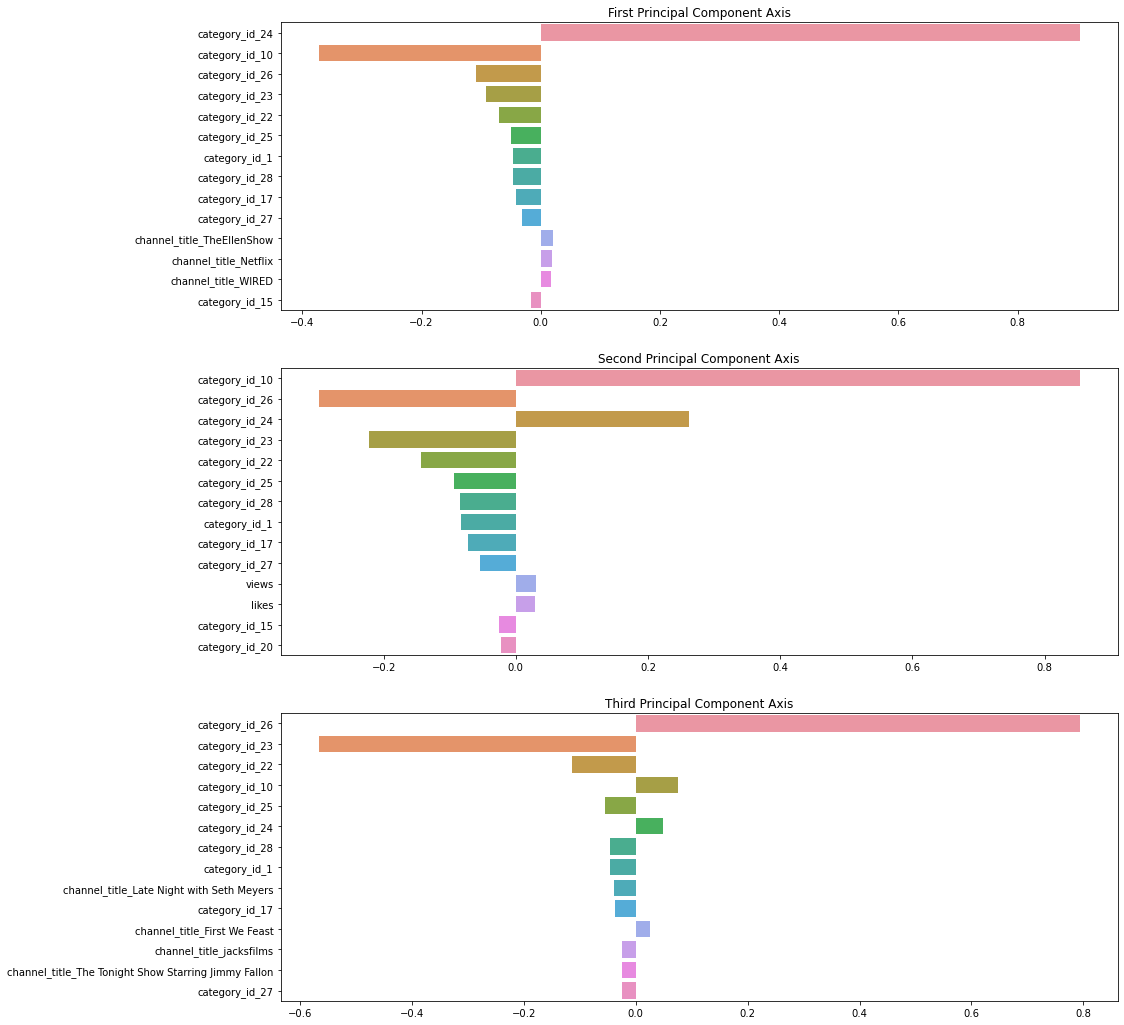

In [72]:
fig, ax = plt.subplots(3, 1, figsize=(15, 18))
sns.barplot(x=fpc_scores.values[:14], y=fpc_scores.index[:14], orient='h', ax=ax[0])
sns.barplot(x=spc_scores.values[:14], y=spc_scores.index[:14], orient='h', ax=ax[1])
sns.barplot(x=tpc_scores.values[:14], y=tpc_scores.index[:14], orient='h', ax=ax[2])

ax[0].set_title('First Principal Component Axis')
ax[1].set_title('Second Principal Component Axis')
ax[2].set_title('Third Principal Component Axis')

## Discussion of PCA and Kernel PCA

As seen from the first 3 principal components, it is interesting that the category of the videos explains most of the variance of the top trending videos. From the first 3 principal component, category_id_24, category_id_10, and category_id_26 respectively explains much of the variance between top trending videos. Only a few categories appear as the first 14 principal component scores. This implies that the trending videos belong to a small group of categories which appeal widely to many people hence they are trending. 

As seen from the fpc_scores, spc_scores, tpc_scores, the principle component scores that explain the variance between top trending videos the least are trending dates. Hence trending dates are unlikely to be associated with trending videos.